## Análisis Exploratorio de Datos (EDA) - Satisfacción de Pasajeros de Aerolínea

#### **Objetivo**: Explorar el dataset para entender los factores que influyen en la satisfacción de los pasajeros y así poder predecir el nivel de satisfacción del pasajero.

### **1. Configuración Inicial**
## Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Carga de Datos**
 Cargamos el dataset y hacemos una primera exploración.

In [2]:
df = pd.read_csv("/Users/andresuescum/Bootcamp/flight-feel-analyzer/data/airline_passenger_satisfaction.csv")

In [ ]:
# Mostrar las primeras filas
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### **3. Limpieza de Datos**
# Verificamos valores nulos y corregimos problemas.


In [5]:
# Verificar valores nulos
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [19]:
# Eliminar filas con valores nulos (si es necesario)
df.dropna(inplace=True)

In [20]:
# Verificar duplicados
df.duplicated().sum()

np.int64(0)

### **4. Análisis de Variables Demográficas**
# Exploramos las características de los pasajeros.

In [21]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.style.use("ggplot")

/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_16193/2025601719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


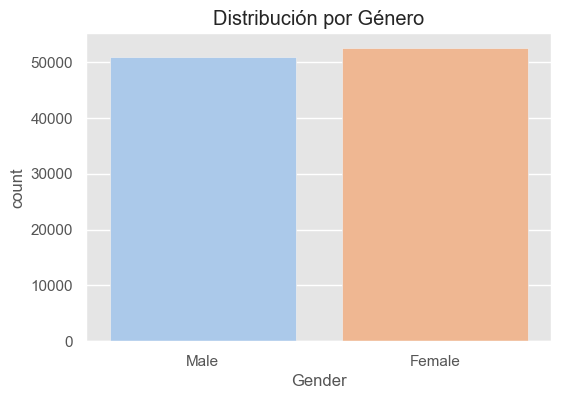

In [22]:
# Distribución por género
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Distribución por Género")
plt.show()

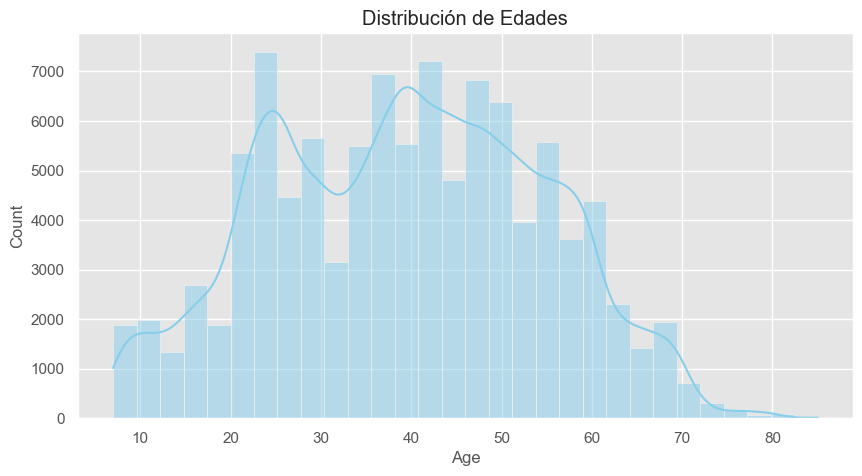

In [23]:
# Distribución por edad
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", bins=30, kde=True, color="skyblue")
plt.title("Distribución de Edades")
plt.show()

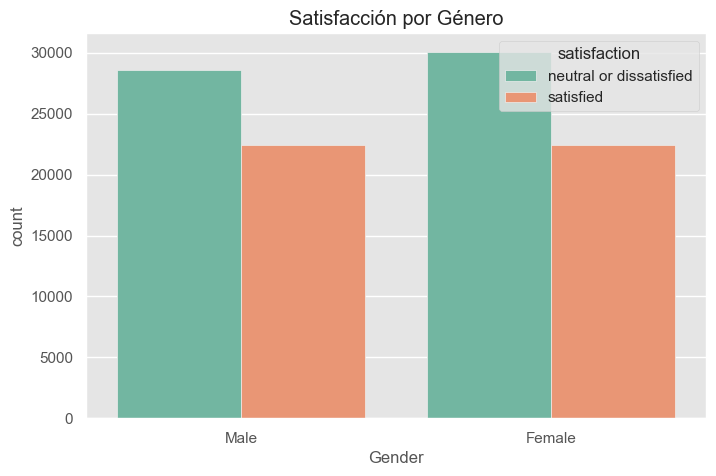

In [24]:
# Satisfacción por género
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="satisfaction", palette="Set2")
plt.title("Satisfacción por Género")
plt.show()

### **5. Análisis de Servicios Evaluados**
# Examinamos las calificaciones de los servicios.

In [25]:
service_columns = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_16193/2977868671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_means.values, y=service_means.index, palette="viridis")


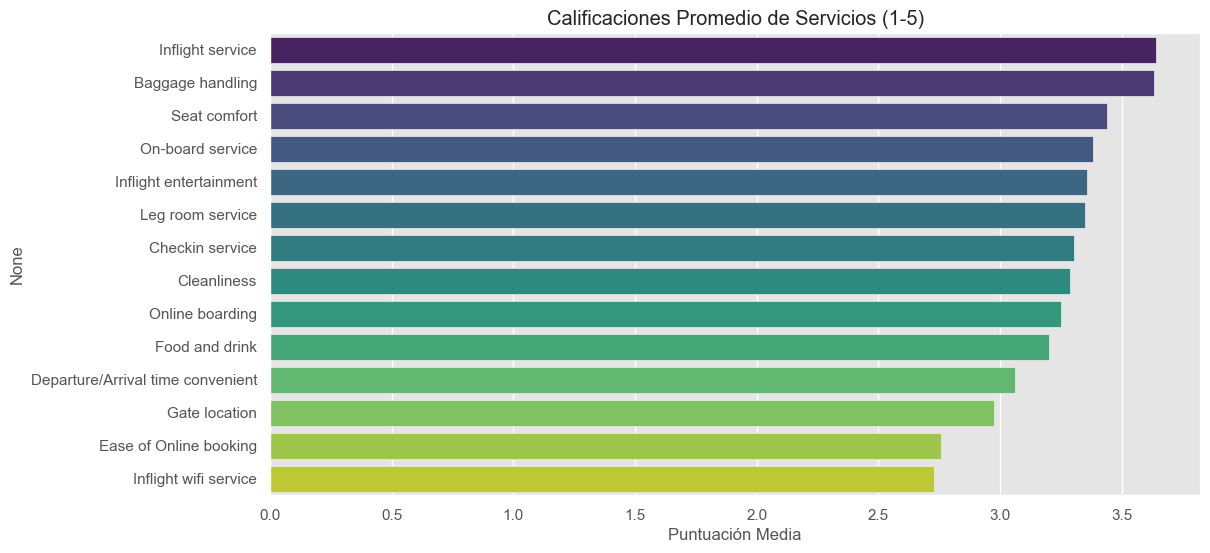

In [26]:
# Calificaciones promedio de los servicios
service_means = df[service_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=service_means.values, y=service_means.index, palette="viridis")
plt.title("Calificaciones Promedio de Servicios (1-5)")
plt.xlabel("Puntuación Media")
plt.show()

### **6. Correlación con la Satisfacción**
# Identificamos qué variables influyen más en la satisfacción.

In [27]:
# Convertir la variable objetivo a numérica (0: neutral/dissatisfied, 1: satisfied)
df["satisfaction_numeric"] = df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [28]:
# Calcular correlaciones
correlations = df[service_columns + ["satisfaction_numeric"]].corr()["satisfaction_numeric"].sort_values(ascending=False)

/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_16193/663113080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations[1:].values, y=correlations[1:].index, palette="coolwarm")


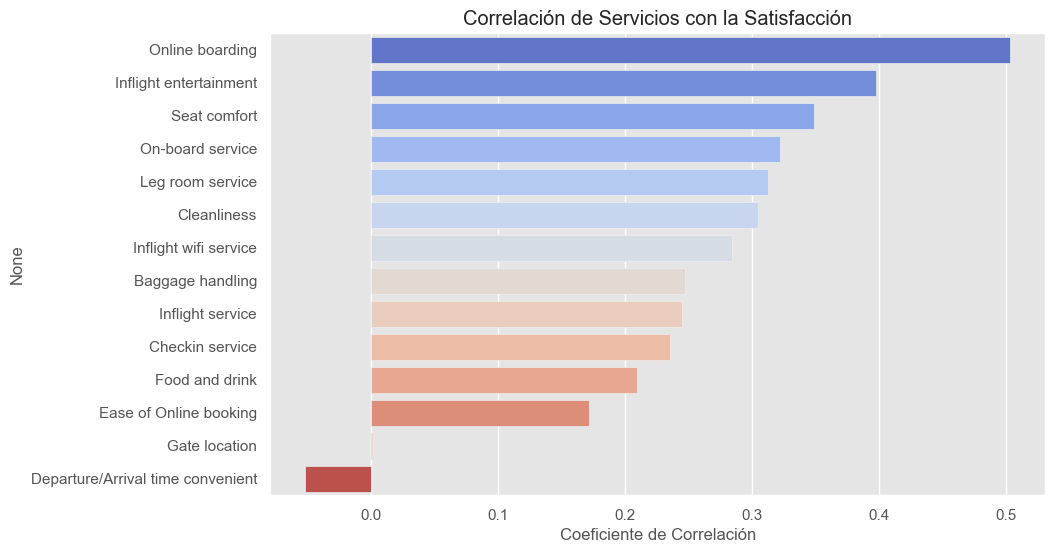

In [29]:
# Gráfico de correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations[1:].values, y=correlations[1:].index, palette="coolwarm")
plt.title("Correlación de Servicios con la Satisfacción")
plt.xlabel("Coeficiente de Correlación")
plt.show()


### **7. Análisis de Retrasos**
# Exploramos el impacto de los retrasos en la satisfacción.

In [30]:
# Estadísticas de retrasos
delay_stats = df[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe()
delay_stats

,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000
mean,14.747939,15.178678
std,38.116737,38.698682
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_16193/1098016263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="satisfaction", y="Departure Delay in Minutes", palette="Set3")


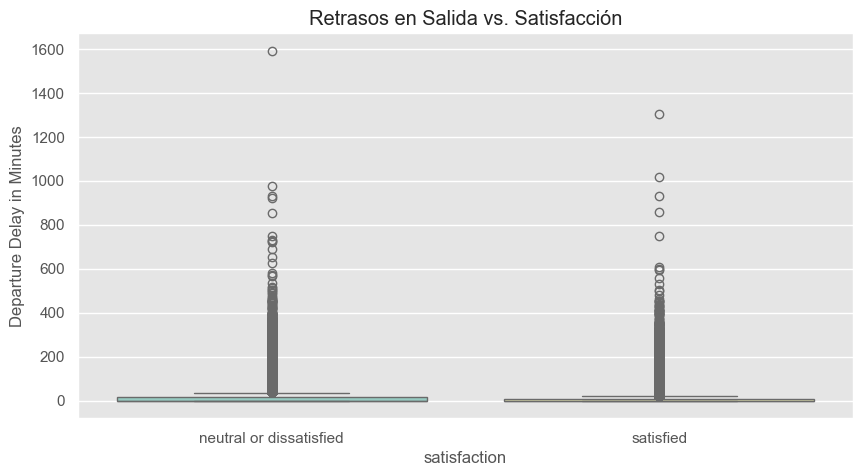

In [31]:
# Relación entre retrasos y satisfacción
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="satisfaction", y="Departure Delay in Minutes", palette="Set3")
plt.title("Retrasos en Salida vs. Satisfacción")
plt.show()

### **8. Conclusiones y Recomendaciones**
# **Hallazgos clave**:
 - Solo **43.5%** de los pasajeros están satisfechos.
 - El **wifi a bordo** es el servicio peor evaluado (2.72/5).
 - Los **retrasos** afectan negativamente la satisfacción (correlación -0.19).
 - Los **clientes leales** están más satisfechos (46%) que los no leales (32%).

## **Recomendaciones**:
 1. **Mejorar el wifi y la experiencia digital** (reservas online, entretenimiento).
 2. **Optimizar la puntualidad** y comunicar mejor los retrasos.
 3. **Programas de fidelización** para retener clientes no leales.
 4. **Enfoque en viajes personales**, que tienen menor satisfacción.

# **Próximos pasos**:
 - Análisis segmentado (ej. por edad, tipo de viaje).
 - Modelado predictivo para identificar factores clave.
 - Benchmarking con competidores.

In [33]:
# Guardar el dataset procesado (opcional)
# df.to_csv("airline_satisfaction_processed.csv", index=False)